In [1]:
from wbfm.utils.projects.finished_project_data import ProjectData

/home/charles/anaconda3/envs/wbfm38/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


# Step 1: using my project class

In [2]:
fname = "/scratch/neurobiology/zimmer/fieseler/wbfm_projects/2022-11-27_spacer_7b_2per_agar/ZIM2165_Gcamp7b_worm1-2022_11_28/project_config.yaml"
project_data_gcamp = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     First time loading all the tracklets, may take a while...
ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/fieseler/wbfm_projects/2022-11-27_spacer_7b_2per_agar/ZIM2165_Gcamp7b_worm1-2022_11_28 
With raw data in directory:
/scratch/neurobiology/zimmer/ulises/wbfm/20221127/data/ZIM2165_Gcamp7b_worm1/2022-11-27_15-14_ZIM2165_worm1_GC7b_Ch0-BH 
See self.worm_posture_class for information on behavioral parameters
Found the following data files:
============Raw Videos=================
red_data:                 True
green_data:               True
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Tracking===================
tracklets:                True
global2tracklet:          True
final_tracks:             True
manual_tracking:          True
============Traces=====================
traces:                   True




## Check that the behavior annotation files were found

If not, you can run an approximate behavioral annotator based on pc1

In [3]:
project_data_gcamp.worm_posture_class

Posture class with the following files:
=========Raw Behavior Videos==============
behavior_video_avi:         True
behavior_video_btf:         True
============Stage Position================
filename_table_position:    True
============Centerline=====================
filename_x:                 True
filename_y:                 True
filename_curvature:         True
============Behavior Annotations===========
filename_beh_annotation:    True


### OPTIONAL, if you need to annotate the behaviors using an alternate pipeline:

In [4]:

# from wbfm.utils.general.utils_behavior_annotation import approximate_behavioral_annotation_using_pc1
# approximate_behavioral_annotation_using_pc1(project_data_gcamp)

# Step 2: Load the triggered average object from a project class

In [5]:
from wbfm.utils.traces.triggered_averages import FullDatasetTriggeredAverages
# help(FullDatasetTriggeredAverages)

In [6]:
triggered_class = FullDatasetTriggeredAverages.load_from_project(project_data_gcamp)
triggered_class

FullDatasetTriggeredAverages with 92 neurons
 With triggered average class: TriggeredAverageIndices: FWD (9 events found)

# Step 3: Plotting

<Axes: title={'center': 'Triggered average for neuron_060'}, ylabel='Activity'>

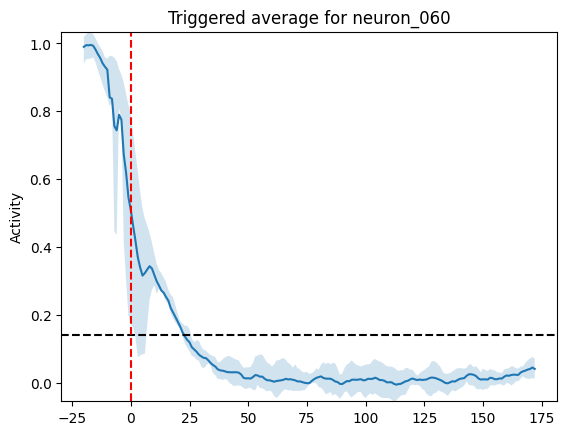

In [7]:
triggered_class.plot_single_neuron_triggered_average('neuron_060')

## Triggering to a different behavioral state

In [8]:
# All states are described in one class
from wbfm.utils.general.utils_behavior_annotation import BehaviorCodes
# help(BehaviorCodes)

In [9]:
# Pass in a dictionary to modify the triggered averages

trigger_opt = dict(state=BehaviorCodes.REV)
triggered_class = FullDatasetTriggeredAverages.load_from_project(project_data_gcamp, trigger_opt=trigger_opt)

In [10]:
# To see more options
help(FullDatasetTriggeredAverages.load_from_project)

Help on function load_from_project in module wbfm.utils.traces.triggered_averages:

load_from_project(project_data, trigger_opt=None, trace_opt=None, triggered_time_series_mode='traces', **kwargs)
    Parameters
    ----------
    project_data - ProjectData class
    trigger_opt - Passed to WormFullVideoPosture.calc_triggered_average_indices
    trace_opt - Passed to ProjectData.calc_default_traces
    triggered_time_series_mode - how to calculate the time series to be triggered on. Options:
        "traces" - fluorescence traces
        "behavior" - behavioral annotations
        "curvature" - curvature from the kymograph
    kwargs - Passed to FullDatasetTriggeredAverages
    
    Returns
    -------



In [11]:
# And even more detailed options
from wbfm.utils.general.postures.centerline_classes import WormFullVideoPosture
help(WormFullVideoPosture.calc_triggered_average_indices)

Help on function calc_triggered_average_indices in module wbfm.utils.general.postures.centerline_classes:

calc_triggered_average_indices(self, state=<BehaviorCodes.FWD: 1>, min_duration=5, ind_preceding=20, behavior_name=None, use_manual_annotation=None, use_hilbert_phase=False, **kwargs)
    Calculates a list of indices that can be used to calculate triggered averages of 'state' ONSET
    
    Default uses the behavior annotation, binarized via comparing to state
        See BehaviorCodes for state indices
    Alternatively, can pass a behavior_name, which will be used to look up the behavior in this class
        Note: this overrides the state parameter
        Note: unless the behavior returned has values understood by BehaviorCodes, this should be set as continuous
        using the kwargs:
            behavioral_annotation_is_continuous = True
            behavioral_annotation_threshold = threshold [OPTIONAL; see TriggeredAverageIndices]
    Alternatively, can pass a behavioral_a

<Axes: title={'center': 'Triggered average for neuron_060'}, ylabel='Activity'>

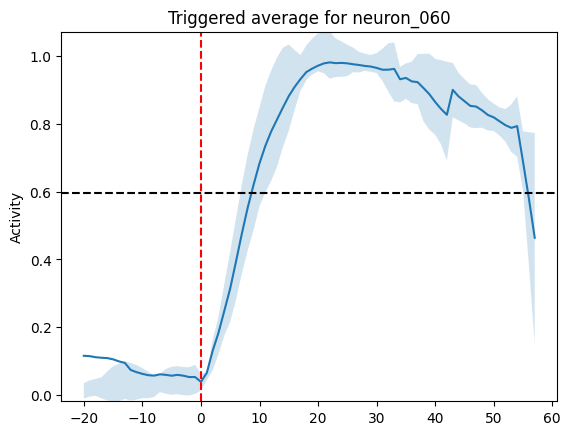

In [12]:
triggered_class.plot_single_neuron_triggered_average('neuron_060')

## Advanced: plot more than one on the same graph

<Axes: title={'center': 'Triggered average for neuron_033'}, ylabel='Activity'>

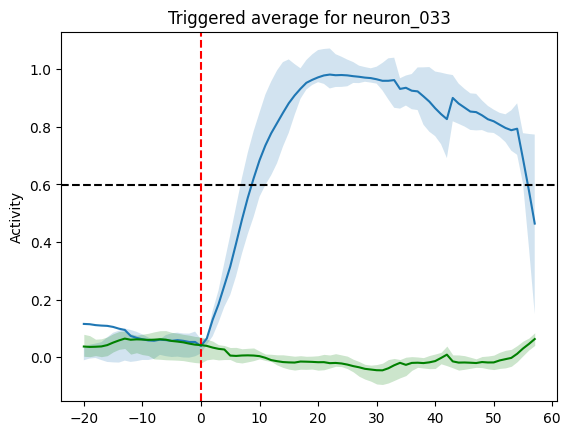

In [13]:
ax = triggered_class.plot_single_neuron_triggered_average('neuron_060')
triggered_class.plot_single_neuron_triggered_average('neuron_033', ax=ax, is_second_plot=True,
                                                    color='green')